# Error analysis CTR

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve, auc, PrecisionRecallDisplay

In [3]:
FEATURES_LIST = [
    "product",
    "campaign_id",
    "product_category_1",
    "product_category_2",
    "gender",
    "age_level",
    "user_depth",
    "city_development_index",
    "var_1",
    "hour",
    "day",
]

CATEGORICAL_FEATURES = [
    "product",
    "campaign_id",
    "product_category_1",
    "product_category_2",
    "gender",
    "var_1",
]

## Load data

In [4]:
RAW_INFR = "X_test_1st.csv"
GT_INFR = "y_test_1st.csv"
PP_INFR = "inference.csv"

RAW_TRAIN = "train_dataset_full.csv"
PP_TEST = "test.csv"

CLASS = "class_"
PROB = "prob_"
SPLIT = "split_"
NO_SPLIT = "no_split_"
PRED_TEST = "predictions_test.csv"
PRED_INFR = "predictions_inference.csv"

# raw
x_r_t = pd.read_csv(RAW_TRAIN)
x_r_i = pd.read_csv(RAW_INFR)
display(x_r_t.head())
display(x_r_i.head())

# preprocessed
x_pp_t = pd.read_csv(PP_TEST)
x_pp_i = pd.read_csv(PP_INFR)
display(x_pp_t.head())
display(x_pp_i.head())

# Inference
y_i = pd.read_csv(GT_INFR, names = ["is_click"])
display(y_i.head())

# class predictions
# train-test split
c_s_p_t = pd.read_csv(CLASS + SPLIT + PRED_TEST)
c_s_p_i = pd.read_csv(CLASS + SPLIT + PRED_INFR, names = ["is_click_predicted"])

display(c_s_p_t.head())
display(c_s_p_i.head())

# no split
c_ns_p_i= pd.read_csv(CLASS + NO_SPLIT + PRED_INFR, names = ["is_click_predicted"])
display(c_ns_p_i.head())

# probabilities predictions
# train-test split
p_s_p_t = pd.read_csv(PROB + SPLIT + PRED_TEST)
p_s_p_i = pd.read_csv(PROB + SPLIT + PRED_INFR, names = ["is_click_predicted"])

display(p_s_p_t.head())
display(p_s_p_i.head())

# no split
p_ns_p_i= pd.read_csv(PROB + NO_SPLIT + PRED_INFR, names = ["is_click_predicted"])
display(p_ns_p_i.head())

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,98528.0,2017-07-04 16:42,7716.0,C,405490.0,60305.0,3.0,NaN,3.0,Male,3.0,3.0,NaN,1.0,1.0
1,589714.0,2017-07-07 07:40,1035283.0,I,118601.0,28529.0,4.0,82527.0,10.0,Female,4.0,3.0,3.0,1.0,0.0
2,478652.0,2017-07-07 20:42,65994.0,H,359520.0,13787.0,4.0,NaN,4.0,Male,4.0,3.0,2.0,0.0,0.0
3,34536.0,2017-07-05 15:05,75976.0,H,405490.0,60305.0,3.0,NaN,3.0,Male,3.0,3.0,3.0,0.0,0.0
4,71863.0,2017-07-06 20:11,987498.0,C,405490.0,60305.0,3.0,NaN,2.0,Male,2.0,3.0,2.0,0.0,0.0


,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1
0,121580,2017-07-03 10:03,352186,H,82320,1734,1,146115.0,2.0,Male,1.0,3.0,4.0,1
1,95831,2017-07-03 14:21,980231,C,405490,60305,3,NaN,6.0,Male,5.0,3.0,NaN,0
2,421806,2017-07-05 17:47,610332,D,404347,53587,1,NaN,3.0,Male,2.0,3.0,1.0,0
3,585403,2017-07-06 11:01,849506,H,118601,28529,5,82527.0,3.0,Male,2.0,3.0,3.0,0
4,496398,2017-07-02 07:50,499495,B,98970,6970,2,NaN,9.0,Female,2.0,3.0,4.0,1


,product,campaign_id,product_category_1,product_category_2,gender,age_level,user_depth,city_development_index,var_1,is_click,hour,day
0,H,359520.0,4.0,NaN,False,4.0,2.0,NaN,False,0.0,4.0,5.0
1,C,359520.0,4.0,NaN,True,3.0,3.0,2.0,False,0.0,19.0,7.0
2,D,98970.0,4.0,NaN,True,3.0,3.0,3.0,True,0.0,15.0,7.0
3,C,405490.0,3.0,NaN,True,3.0,3.0,2.0,True,0.0,8.0,6.0
4,I,360936.0,2.0,NaN,False,5.0,3.0,2.0,True,0.0,16.0,5.0


,product,campaign_id,product_category_1,product_category_2,gender,age_level,user_depth,city_development_index,var_1,hour,day
0,H,82320,1,146115.0,True,1.0,3.0,4.0,True,10,3
1,C,405490,3,NaN,True,5.0,3.0,NaN,False,14,3
2,D,404347,1,NaN,True,2.0,3.0,1.0,False,17,5
3,H,118601,5,82527.0,True,2.0,3.0,3.0,False,11,6
4,B,98970,2,NaN,False,2.0,3.0,4.0,True,7,2


,is_click
0,0
1,0
2,0
3,0
4,0


,product,campaign_id,product_category_1,product_category_2,gender,age_level,user_depth,city_development_index,var_1,is_click,hour,day,is_click_predicted
0,H,359520.0,4.0,NaN,0.0,4.0,2.0,NaN,0.0,0.0,4.0,5.0,0.0
1,C,359520.0,4.0,NaN,1.0,3.0,3.0,2.0,0.0,0.0,19.0,7.0,0.0
2,D,98970.0,4.0,NaN,1.0,3.0,3.0,3.0,1.0,0.0,15.0,7.0,1.0
3,C,405490.0,3.0,NaN,1.0,3.0,3.0,2.0,1.0,0.0,8.0,6.0,1.0
4,I,360936.0,2.0,NaN,0.0,5.0,3.0,2.0,1.0,0.0,16.0,5.0,0.0


,is_click_predicted
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


,is_click_predicted
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


,product,campaign_id,product_category_1,product_category_2,gender,age_level,user_depth,city_development_index,var_1,is_click,hour,day,is_click_predicted
0,H,359520.0,4.0,NaN,0.0,4.0,2.0,NaN,0.0,0.0,4.0,5.0,0.438559
1,C,359520.0,4.0,NaN,1.0,3.0,3.0,2.0,0.0,0.0,19.0,7.0,0.422539
2,D,98970.0,4.0,NaN,1.0,3.0,3.0,3.0,1.0,0.0,15.0,7.0,0.578620
3,C,405490.0,3.0,NaN,1.0,3.0,3.0,2.0,1.0,0.0,8.0,6.0,0.541891
4,I,360936.0,2.0,NaN,0.0,5.0,3.0,2.0,1.0,0.0,16.0,5.0,0.395593


,is_click_predicted
0,0.498124
1,0.671820
2,0.497924
3,0.581145
4,0.472333


,is_click_predicted
0,0.479188
1,0.672355
2,0.495231
3,0.569352
4,0.441821


In [5]:
thr = 0.5

print(f"f1 class test train-test split: {f1_score(c_s_p_t.is_click, c_s_p_t.is_click_predicted)}")
print(f"f1 class inference train-test split: {f1_score(y_i.iloc[:, 0], c_s_p_i.iloc[:, 0])}")
print(f"f1 class inference no split: {f1_score(y_i.iloc[:, 0], c_ns_p_i.iloc[:, 0])}")
print()
print(f"f1 prob test train-test split: {f1_score(p_s_p_t.is_click, p_s_p_t.is_click_predicted > thr)}")
print(f"f1 prob inference train-test split: {f1_score(y_i.iloc[:, 0], p_s_p_i.iloc[:, 0] > thr)}")
print(f"f1 prob inference no split: {f1_score(y_i.iloc[:, 0], p_ns_p_i.iloc[:, 0] > thr)}")

f1 class test train-test split: 0.1492720683088642
f1 class inference train-test split: 0.15270790174607873
f1 class inference no split: 0.15470152898305722

f1 prob test train-test split: 0.1492720683088642
f1 prob inference train-test split: 0.15270790174607873
f1 prob inference no split: 0.15470152898305722


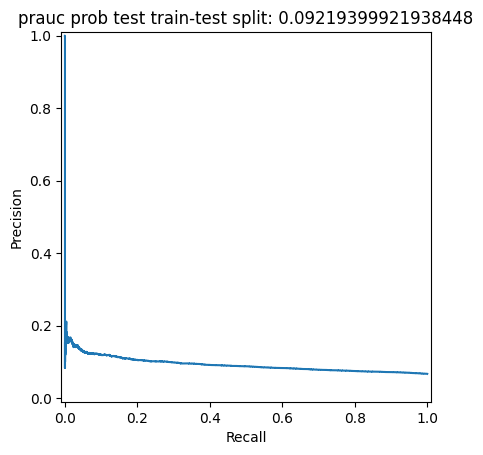

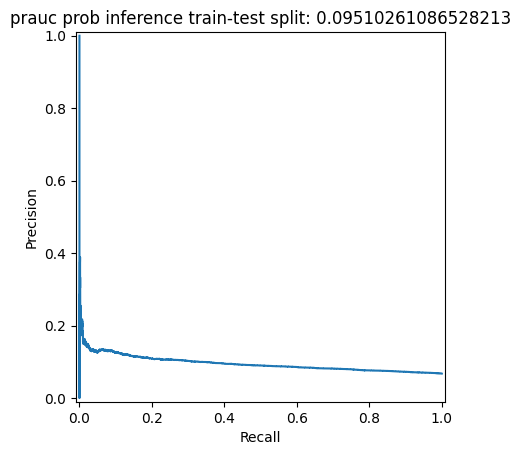

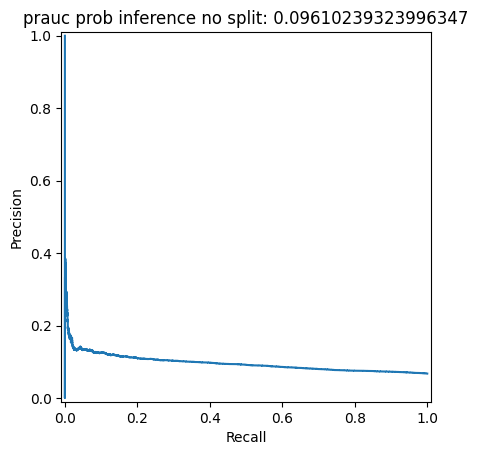

In [6]:
y_trues = [p_s_p_t.is_click, y_i.is_click, y_i.is_click]
y_scores = [p_s_p_t.is_click_predicted, p_s_p_i.is_click_predicted, p_ns_p_i.is_click_predicted]
results_labels = ["prob test train-test split",
                  "prob inference train-test split",
                  "prob inference no split"]

for y_true, y_score, label in zip(y_trues, y_scores, results_labels):
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    pr_auc = auc(recall, precision)
    disp = PrecisionRecallDisplay(precision=precision, recall=recall)
    disp.plot()
    plt.title(f"prauc {label}: {pr_auc}")
    plt.show()
    print()

## Error analysis probabilities

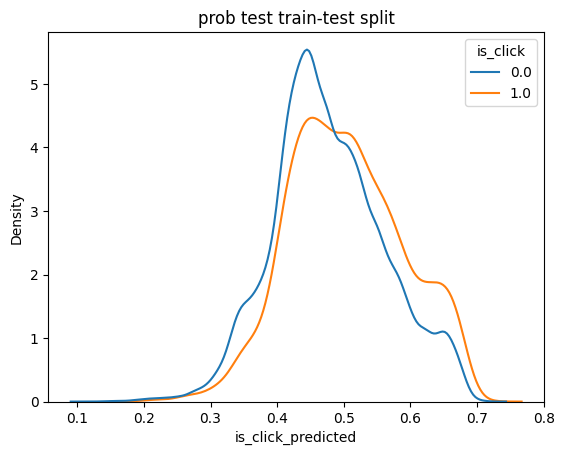

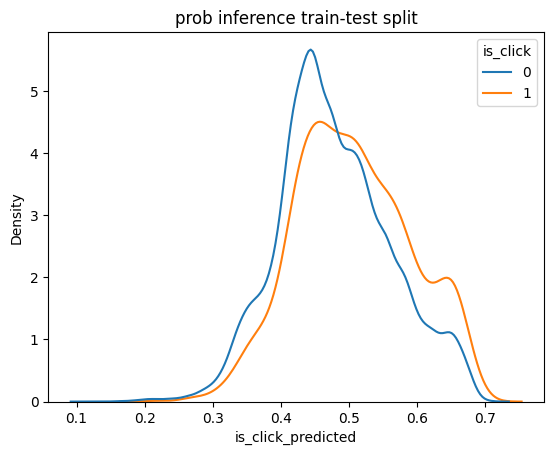

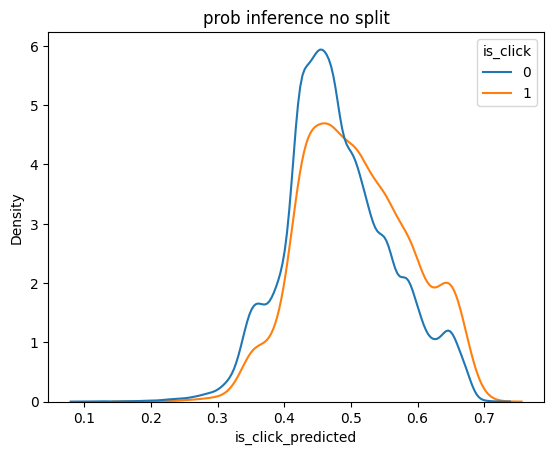

In [7]:
y_trues = [p_s_p_t.is_click, y_i.is_click, y_i.is_click]
y_scores = [p_s_p_t.is_click_predicted, p_s_p_i.is_click_predicted, p_ns_p_i.is_click_predicted]
results_labels = ["prob test train-test split",
                  "prob inference train-test split",
                  "prob inference no split"]

for y_true, y_score, label in zip(y_trues, y_scores, results_labels):
    sns.kdeplot(x=y_score, hue=y_true, common_norm=False)
    plt.title(label)
    plt.show()

In [8]:
error_analysis_thr = 0.5

error_analysis_data = x_pp_i.copy()
error_analysis_data[FEATURES_LIST] = error_analysis_data[FEATURES_LIST].astype(str)
error_analysis_data["is_click"] = y_i.is_click
error_analysis_data["is_click_predicted"] = p_ns_p_i.is_click_predicted > error_analysis_thr
error_analysis_data["is_click_predicted_prob"] = p_ns_p_i.is_click_predicted
error_analysis_data["is_click_correct"] = error_analysis_data["is_click"] == error_analysis_data["is_click_predicted"]
error_analysis_data["is_click_diff"] = np.abs(error_analysis_data["is_click_predicted_prob"] - error_analysis_data["is_click"])
error_analysis_data["conf_matrix"] = np.select(
    [
        (error_analysis_data["is_click"] == 1) & (error_analysis_data["is_click_predicted"] == 1),  # TP
        (error_analysis_data["is_click"] == 0) & (error_analysis_data["is_click_predicted"] == 1),  # FP
        (error_analysis_data["is_click"] == 0) & (error_analysis_data["is_click_predicted"] == 0),  # TN
        (error_analysis_data["is_click"] == 1) & (error_analysis_data["is_click_predicted"] == 0),  # FN
    ],
    ["TP", "FP", "TN", "FN"],
    default="Unknown"
)

display(error_analysis_data)

,product,campaign_id,product_category_1,product_category_2,gender,age_level,user_depth,city_development_index,var_1,hour,day,is_click,is_click_predicted,is_click_predicted_prob,is_click_correct,is_click_diff,conf_matrix
0,H,82320,1,146115.0,True,1.0,3.0,4.0,True,10,3,0,False,0.479188,True,0.479188,TN
1,C,405490,3,nan,True,5.0,3.0,nan,False,14,3,0,True,0.672355,False,0.672355,FP
2,D,404347,1,nan,True,2.0,3.0,1.0,False,17,5,0,False,0.495231,True,0.495231,TN
3,H,118601,5,82527.0,True,2.0,3.0,3.0,False,11,6,0,True,0.569352,False,0.569352,FP
4,B,98970,2,nan,False,2.0,3.0,4.0,True,7,2,0,False,0.441821,True,0.441821,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60223,B,82320,1,nan,True,5.0,3.0,2.0,True,17,2,0,False,0.372684,True,0.372684,TN
60224,C,360936,5,nan,True,4.0,3.0,2.0,False,15,5,0,False,0.348257,True,0.348257,TN
60225,C,82320,1,nan,False,1.0,3.0,nan,False,18,2,0,False,0.436292,True,0.436292,TN
60226,H,82320,1,146115.0,False,5.0,3.0,nan,False,20,6,1,False,0.459266,False,0.540734,FN


  product  is_click_correct
0       A          0.709147
1       B          0.842776
2       C          0.616203
3       D          0.535112
4       E          0.520275
5       F          0.922454
6       G          0.942373
7       H          0.610604
8       I          0.677613
9       J          0.121116


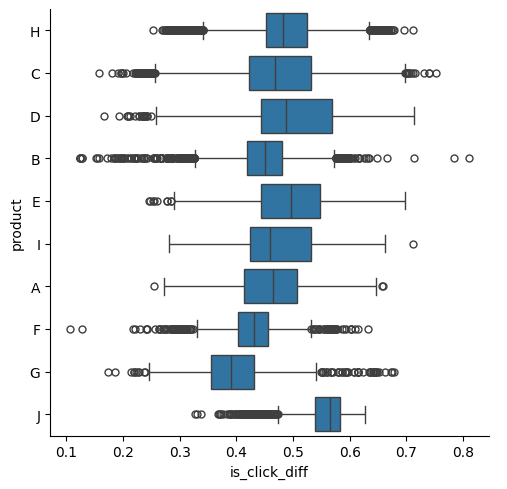

  campaign_id  is_click_correct
0      105960          0.592035
1      118601          0.772298
2      359520          0.878408
3      360936          0.952202
4      396664          0.416718
5      404347          0.360775
6      405490          0.244820
7      414149          0.747076
8       82320          0.778617
9       98970          0.422816


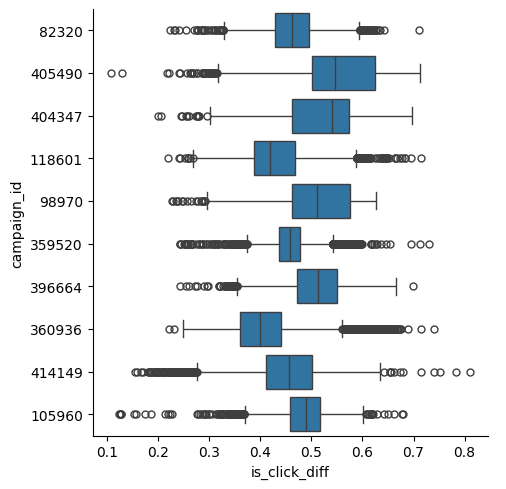

  product_category_1  is_click_correct
0                  1          0.516900
1                  2          0.769641
2                  3          0.379317
3                  4          0.810652
4                  5          0.664044


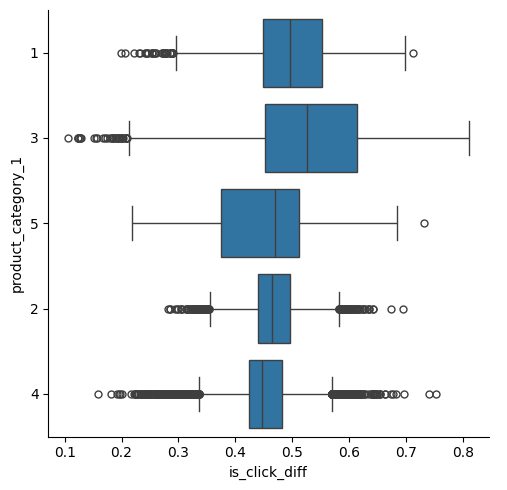

   product_category_2  is_click_correct
0            143597.0          0.836898
1            146115.0          0.499848
2             18595.0          0.909091
3            234846.0          1.000000
4            235358.0          1.000000
5            254132.0          0.595916
6            255689.0          0.800000
7            269093.0          0.227273
8            270915.0          0.577726
9            300711.0          1.000000
10            32026.0          0.662651
11           372532.0          1.000000
12           408790.0          0.833333
13           408831.0          1.000000
14           419804.0          0.833333
15           450184.0          1.000000
16            66101.0          1.000000
17            82527.0          0.772298
18                nan          0.623414


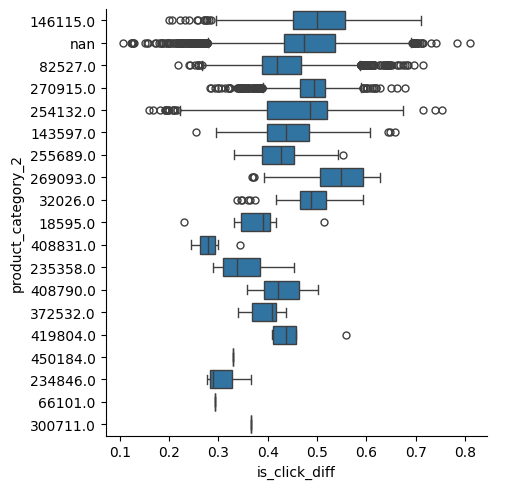

  gender  is_click_correct
0  False          0.707848
1   True          0.615207
2    nan          0.640866


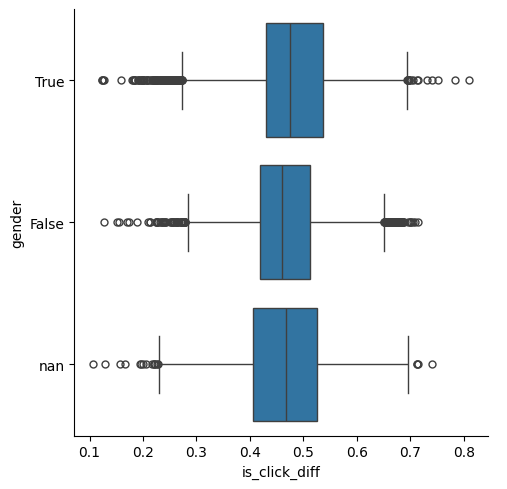

  age_level  is_click_correct
0       0.0          0.526316
1       1.0          0.517505
2       2.0          0.579018
3       3.0          0.665967
4       4.0          0.714355
5       5.0          0.601093
6       6.0          0.645768
7       nan          0.640866


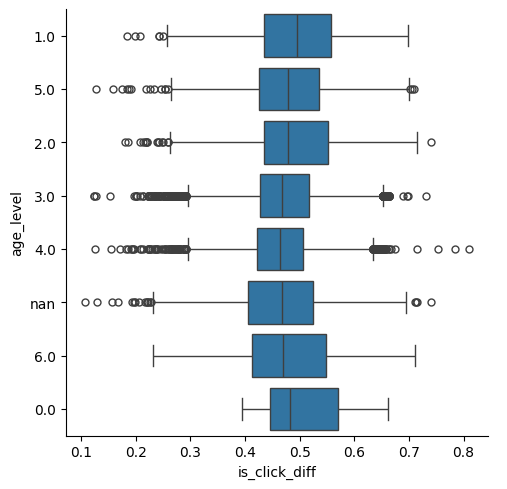

  user_depth  is_click_correct
0        2.0          0.673602
1        3.0          0.624496
2        nan          0.640866


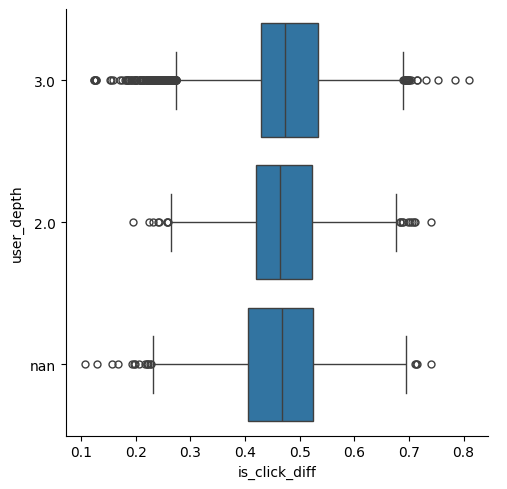

  city_development_index  is_click_correct
0                    1.0          0.617803
1                    2.0          0.598065
2                    3.0          0.618726
3                    4.0          0.657619
4                    nan          0.650709


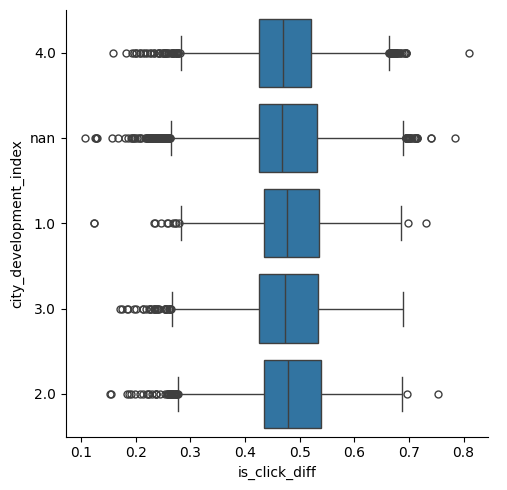

   var_1  is_click_correct
0  False          0.660231
1   True          0.580088


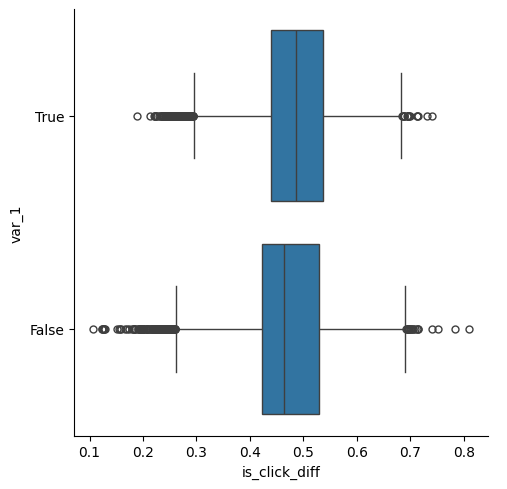

   hour  is_click_correct
0     0          0.646209
1     1          0.700000
2    10          0.644199
3    11          0.639574
4    12          0.642596
5    13          0.649531
6    14          0.637515
7    15          0.608374
8    16          0.597477
9    17          0.632632
10   18          0.645308
11   19          0.626827
12    2          0.687204
13   20          0.616749
14   21          0.624689
15   22          0.612754
16   23          0.653846
17    3          0.693291
18    4          0.687637
19    5          0.616530
20    6          0.553795
21    7          0.602696
22    8          0.607207
23    9          0.629630


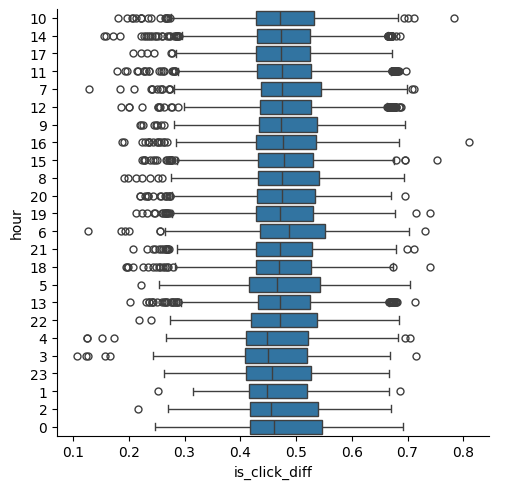

  day  is_click_correct
0   2          0.636018
1   3          0.570789
2   4          0.559775
3   5          0.660825
4   6          0.656942
5   7          0.675179


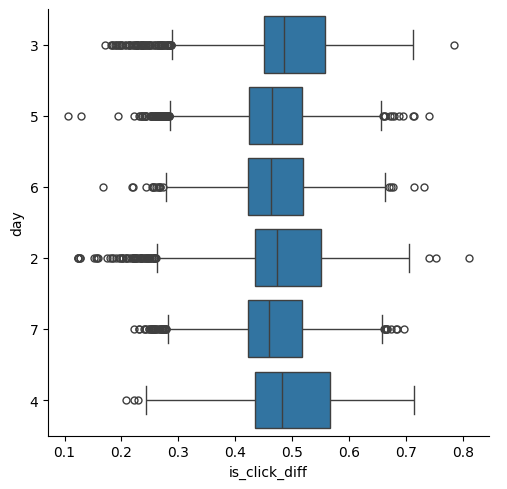

In [10]:
for categorical_column in FEATURES_LIST:

    # Calculate median and count for sorting
    stats = (
        error_analysis_data
        .groupby(categorical_column)["is_click_diff"]
        .agg(['median', 'count'])
        .reset_index()
        .sort_values(by="median", ascending=True)
    )

    # Append count to category names
    category_labels = {
        row[categorical_column]: f"{row[categorical_column]} (n={row['count']})"
        for _, row in stats.iterrows()
    }

    # Reorder categorical variable
    error_analysis_data[categorical_column] = pd.Categorical(
        error_analysis_data[categorical_column],
        categories=stats[categorical_column],
        ordered=True
    )

    print(error_analysis_data.groupby(categorical_column)["is_click_correct"].mean().reset_index().to_string())
    print(stats.to_string())

    # sns.catplot(data = error_analysis_data, y = categorical_column, x = "is_click_diff", kind = "box")
    ax = sns.boxplot(
        data=error_analysis_data,
        y=categorical_column,
        x="is_click_diff",
        order=stats[categorical_column]
    )

    ax.set_yticklabels([category_labels[label] for label in stats[categorical_column]])
    plt.title(f"Boxplot of {categorical_column} sorted by median")
    plt.show()